In [62]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import sys
from torch.autograd import Variable
import torch.optim as optim
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [63]:
DIM = 10
class Net(nn.Module):
    def __init__(self, input_dim=DIM, out_dim=DIM):
        super(Net, self).__init__()
        self.h1 = nn.Linear(input_dim, 15)
        self.h2 = nn.Linear(15, 10)
        self.h3 = nn.Linear(10, 15)
        self.logit = nn.Linear(15, out_dim)

    def forward(self, x):
        x = torch.relu(self.h1(x))
        x = torch.relu(self.h2(x))
        x = torch.relu(self.h3(x))
        x = self.logit(x)
        return x
    
    def inner(self, x):
        x = torch.relu(self.h1(x))
        x = torch.relu(self.h2(x))
        return x

In [64]:
def fetch_batch(x, y, batch_index, batch_size):
    start = batch_index*batch_size
    end = batch_index*batch_size+batch_size
    x_batch = x[start:end]
    if y is not None:
        y_batch = y[start:end]
        return x_batch, y_batch
    else:
        return x_batch

In [78]:
def train(net, x_train, epoches=50, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=lr)

    N_EPOCHES = epoches
    BS = 1000
    n_batches = int(np.ceil(x_train.shape[0] / BS))
    print(n_batches)
    train_losses = []
    for i in range(N_EPOCHES):
        y_train = x_train
        for bi in range(n_batches):
            x_batch, y_batch = fetch_batch(x_train, y_train, bi, BS)
            x_train_var = Variable(torch.from_numpy(x_batch))
            y_train_var = Variable(torch.from_numpy(y_batch))
            optimizer.zero_grad()
            outputs = net(x_train_var)
            loss = criterion(outputs, y_train_var)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
            if bi%100 == 0:
                sys.stdout.write('\rEpoch: %d Iter: %d train loss: %.5f'
                                 %(i, bi, loss.item()))
                sys.stdout.flush()
    return train_losses

In [79]:
def gen_data(samples, dim, prop=0.95):
    x, y = make_classification(n_samples=samples,
                               n_features=dim,
                               n_redundant=0,
                               n_informative=int(dim/2),
                               n_clusters_per_class=1,
                               weights=[prop, 1-prop])
    return x, y

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


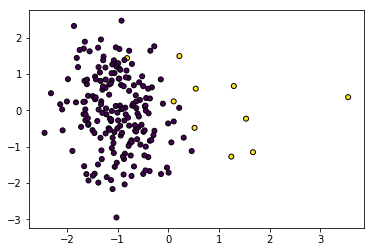

In [82]:
def test_gen_data():
    x, y = gen_data(200, 2)
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=y,
                s=25, edgecolor='k')
    print(y)
    
test_gen_data()

Net(
  (h1): Linear(in_features=10, out_features=15, bias=True)
  (h2): Linear(in_features=15, out_features=10, bias=True)
  (h3): Linear(in_features=10, out_features=15, bias=True)
  (logit): Linear(in_features=15, out_features=10, bias=True)
)
15
Epoch: 49 Iter: 0 train loss: 0.00290

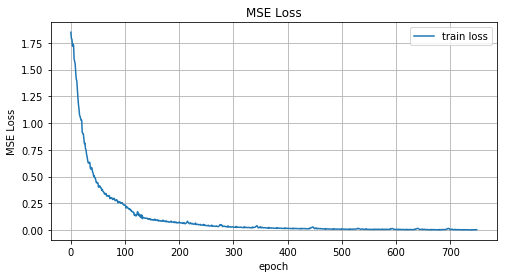

In [81]:
net = Net()
print(net)
x, y = gen_data(15000, DIM)
train_losses = train(net, x.astype(np.float32))
fig = plt.figure(figsize=(8, 4))
ax = sns.lineplot(np.arange(len(train_losses)), train_losses)
ax.set(xlabel='epoch', ylabel='MSE Loss')
plt.legend(['train loss'])
plt.title('MSE Loss')
plt.grid()
ax.set_axisbelow(True)
plt.show()